# Prediction of Wine Quality

In [54]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [55]:
#Using the head() function
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Let's do some plotting to know how the data columns are distributed in the dataset¶


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

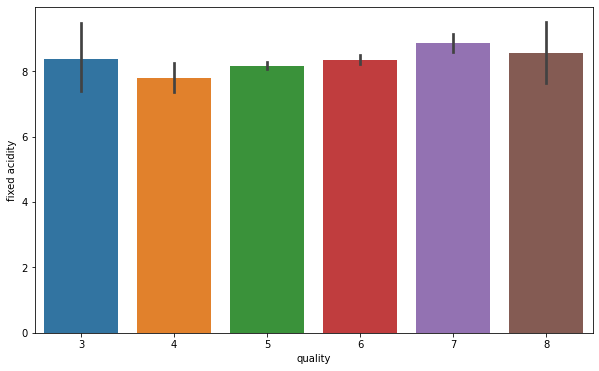

In [57]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

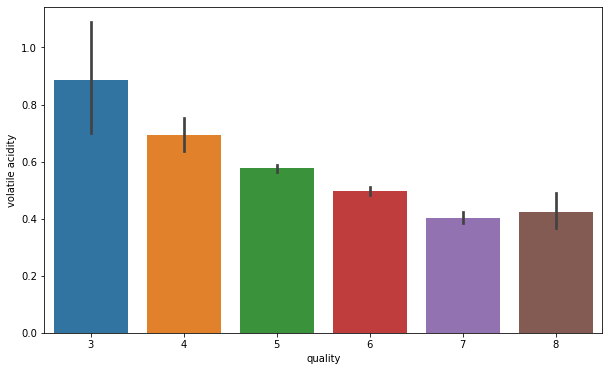

In [58]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

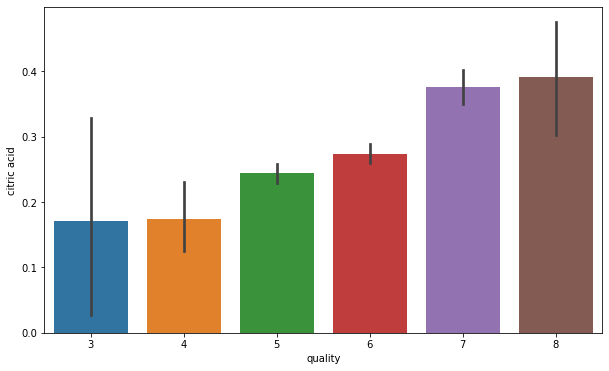

In [59]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

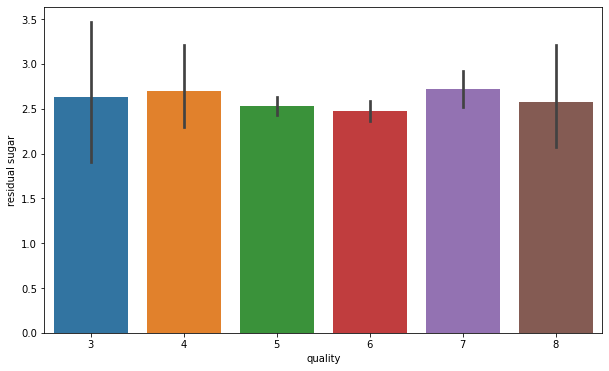

In [60]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

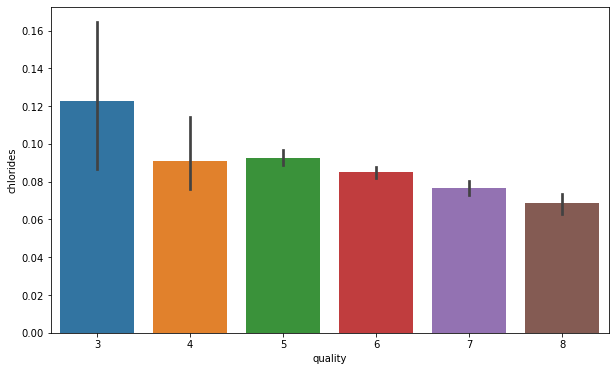

In [61]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

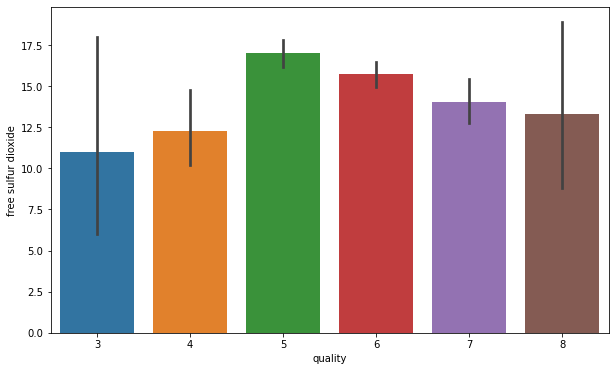

In [62]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

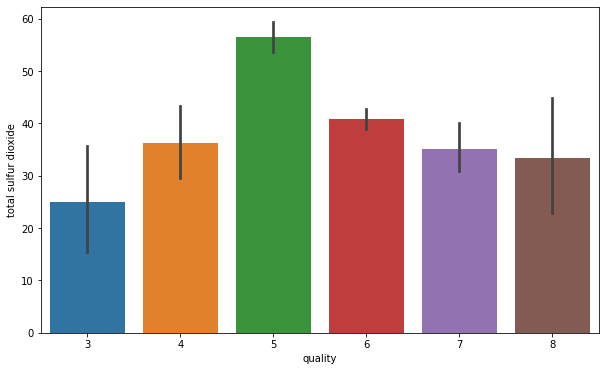

In [63]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

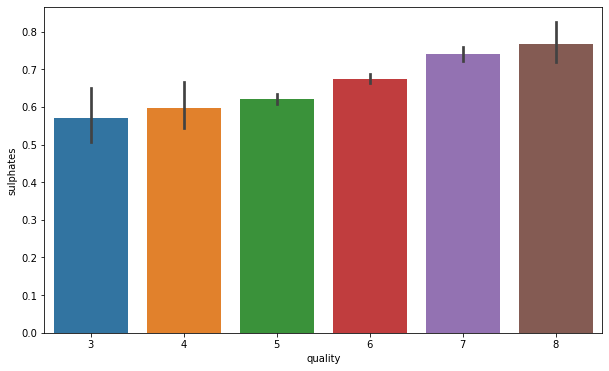

In [64]:
# Sulphates levels go higher with the quality of wine
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = "quality", y = "sulphates", data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

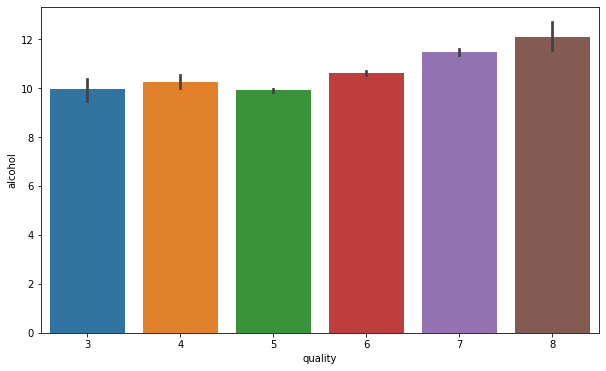

In [65]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

# Preprocessing data for performing Machine Learning 

In [66]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [67]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [68]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [70]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

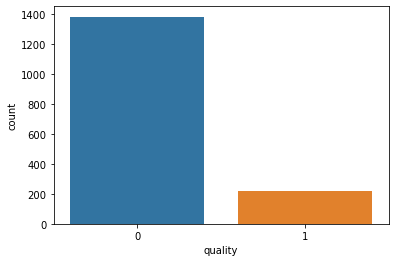

In [73]:
sns.countplot(df['quality'])

In [74]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [75]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [76]:
#Applying Standard Scaling to get optimized results
sc = StandardScaler()

In [77]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Our training and testing data is ready now to perform machine learning algorithm¶

#### Random Forest Classifier

In [78]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [80]:
#Let's see how ur model has performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       273
           1       0.75      0.38      0.51        47

    accuracy                           0.89       320
   macro avg       0.83      0.68      0.72       320
weighted avg       0.88      0.89      0.88       320



#### Random Forest gives the accuracy of 89% 

In [81]:
#Confusion Matrix for the Random Forest Classifier
print(confusion_matrix(y_test, pred_rfc))

[[267   6]
 [ 29  18]]


# Support Vector Machine

In [82]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [83]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



#### Support Vector Machine gets 86%

# Let's try to increase our accuracy of models¶

#### Grid Search CV

In [84]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [85]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [86]:
#Best parameter for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [87]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



#### SVC improves from 86% to 90% using Grid Search CV.

# Cross Validation Score for random forest and SGD¶

In [88]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9140132874015748

#### Random forest accuracy increases from 87% to 91 % using cross validation score.